In [2]:
using  Plots, LaTeXStrings
include("..\\Code_jail\\Master_func.jl")

SpecialFunction (generic function with 2 methods)

# We aim to approximate
$$
I = \int_{-\infty}^{\infty}e^{ik x - \omega(k)t}\hat{q}_0(k)\mathrm{d}k.
$$
Note that if we have
$$
\tilde{q}(x) = q(φ^{-1}(x)), \text{ with }\tilde{q}:[-1,1]\to\mathbb{R}\text{ and } \varphi^{-1}:[-1,1]\to[0,L]: x ↦ \frac{L}{2}(x+1),
$$
then
$$
\mathcal{F}(q)[k] = \frac{L}{2}e^{-ik\frac{L}{2}} \mathcal{F}(\tilde{q})\left[\frac{L}{2}k\right].
$$
Thus, doing the decomposition of $\tilde{q}$ and mapping back, we get
where 
\begin{align*}
\hat{q}_0(k) &= \frac{L}{2}e^{-ik\frac{L}{2}}\int_{-1}^1 e^{-ixk\frac{L}{2}}\tilde{q}(x)\mathrm{d}x = \frac{L}{2}e^{-ik\frac{L}{2}}\left(\sum_{j=0}^{N-1} -\left(\frac{2}{ikL}\right)^{j+1}\left[\tilde{q}^{(j)}(x)e^{-ik\frac{L}{2}x}\right]_{-1}^1 + \left(\frac{2}{ikL}\right)^{N}\int_{-1}^1\tilde{q}^{(N)}(x)e^{-ik\frac{L}{2}x}\mathrm{d}x\right).\\
&= -\sum_{j=0}^{N-1} \left(\frac{2}{L}\right)^{j}\left(\frac{1}{ik}\right)^{j+1}\left[\tilde{q}^{(j)}(x)e^{-ik\frac{L}{2}(x+1)}\right]_{-1}^1 + \left(\frac{2}{L}\right)^{N-1}\left(\frac{1}{ik}\right)^{N}\int_{-1}^1\tilde{q}^{(N)}(x)e^{-ik\frac{L}{2}(x+1)}\mathrm{d}x
\end{align*}
Then define
$$
I_m(x,t) = \int_{-\infty}^{\infty}e^{ik x - \omega(k)t}(ik)^{-m}\mathrm{d}k
$$
We then have that the integral becomes
$$
I = \sum_{j=0}^{N-1} \left(\frac{2}{L}\right)^{j}\left(\tilde{q}^{(j)}(-1)I_{j+1}(x,t)-\tilde{q}^{(j)}(1)I_{j+1}(x-L,t)\right) + \left(\frac{2}{L}\right)^{N-1}\int_{-1}^{1}\tilde{q}^{(N)}(s)I_N\left(x-\frac{L}{2}(s+1),t\right)\mathrm{d}s.
$$
# The reference solution
Let's say we have that case where $L=2$ and $q=\sin(π x)$. We then have that $\hat{q}=\frac{π (e^{-2ik}-1)}{k^2-\pi^2}$. We then want to evaluate
\begin{align*}
\int_{-\infty}^∞ e^{ikx-k^2t}\frac{π (e^{-2ik}-1)}{k^2-\pi^2}\mathrm{d}k &= \int_{-\infty}^∞ \left(e^{ik(x-2)-k^2t}-e^{ikx-k^2t}\right)\frac{π}{(k-\pi)(k+π)}\mathrm{d}k\\
&= \frac{1}{2}\int_{-\infty}^∞ \left(e^{ik(x-2)-k^2t}-e^{ikx-k^2t}\right)\left(\frac{1}{k-π}-\frac{1}{k+π}\right)\mathrm{d}k\\
&= \frac{1}{2}\int_{-\infty}^∞ \frac{e^{ik(x-2)-k^2t}-e^{ikx-k^2t}}{k-π}\mathrm{d}k-\frac{1}{2}\int_{-\infty}^∞ \frac{e^{ik(x-2)-k^2t}-e^{ikx-k^2t}}{k+π}\mathrm{d}k\\
&= \frac{1}{2}\int_{-\infty}^∞ \frac{e^{i(k+\pi)(x-2)-(k+\pi)^2t}-e^{i(k+\pi)x-(k+\pi)^2t}}{k}\mathrm{d}k-\frac{1}{2}\int_{-\infty}^∞ \frac{e^{i(k-π)(x-2)-(k-π)^2t}-e^{(k-π)x-(k-π)^2t}}{k}\mathrm{d}k\\
&= \frac{e^{i\pi(x-2)-\pi^2t}}{2}iI_{1}(x-2+2πti,t)-\frac{e^{iπx-\pi^2t}}{2}iI_{1}(x+2πti,t)\\&~~~~-\frac{e^{-i\pi(x-2)-\pi^2t}}{2}iI_{1}(x-2-2πti,t)+\frac{e^{-iπx-\pi^2t}}{2}iI_{1}(x-2πti,t)
\end{align*}


In [3]:
function First_Int(w,x,t,f,N,L)
    Res = 0; 
    SF = (m,x,t) -> SpecialFunction(w, x, t, -m, 300); #SF = ∫exp(ixk-w(k)t)*(ik)^m
    for i1 = 0:(N-1)
        Res += (2/L)^i1*(f(-1)*SF(i1+1,x,t)-f(1)*SF(i1+1,x-L,t));
        f = Diff(f);
    end
    s = curv(x->x,-1,1,x->1,1000)
    Res += (2/L)^(N-1)*Clen_Curt(z -> f.(z).*SF.(N,x-L/2*(z+1),t),s)
    return Res
end

First_Int (generic function with 1 method)

In [4]:
w =  [1];
x = 0.5;
t = 0.01;
N_ult = 100;
L = 2;
ψ = x -> (x+1)*L/2;
ϕ = x -> 2/L*x-1;
f = x -> sin(pi*x);
ff = UltraFun(0,x -> f(ψ(x)),N_ult);
N = 2;
rel_res = First_Int(w,x,t,ff,N,L)

int1 = (g,k,x,t) -> exp(1im*k*x-k^2*t)*g(k)
g = k -> -(π*(1-exp.(-2im*k)))/(k^2 .- π^2)

s = curv(x -> x,-100,100, x ->  1, 20000, 0, 0 )
Clen_Curt(k -> int1(g,k,x,t),s) - rel_res

-0.028404052232565036 + 0.02344371382811843im

In [4]:
w =  [1];
x = 0.5;
t = 0.01;
N_ult = 100;
L = 2;
ψ = x -> (x+1)*L/2;
ϕ = x -> 2/L*x-1;
f = x -> sin(pi*x);
ff = UltraFun(0,x -> f(ψ(x)),N_ult);
N = 1;
SSS = (x,t) -> First_Int(w,x,t,ff,N,L)

Nt = 10;
Nx = 10;
T = 1
tt = T/(Nt):T/(Nt):T
xx = L/(Nx-1):L/(Nx-1):L-L/(Nx-1)

Nx = length(xx)
Nt = length(tt)


SF = (x,t) -> SpecialFunction(w, x, t, -1, 300);
Solu = (x,t) -> exp(1im*pi*(x-2)-pi^2*t)/2*1im*SF(x-2+2im*pi*t,t) - exp(1im*pi*x-pi^2*t)/2*1im*SF(x+2im*pi*t,t)-exp(-1im*pi*(x-2)-pi^2*t)/2*1im*SF(x-2-2im*pi*t,t) + exp(-1im*pi*x-pi^2*t)/2*1im*SF(x-2im*pi*t,t);

SS = Complex.(zeros(Nx,Nt))
ERR = Complex.(zeros(Nx,Nt))
for i2 = 1:Nt
    i2 |>display
    for i1 = 1:Nx
        SS[i1,i2] = SSS(xx[i1],tt[i2])
        #ERR[i1,i2] = abs(Solu(xx[i1],tt[i2])-SS[i1,i2])
    end
end

1

2

3

4

5

6

7

8

9

10

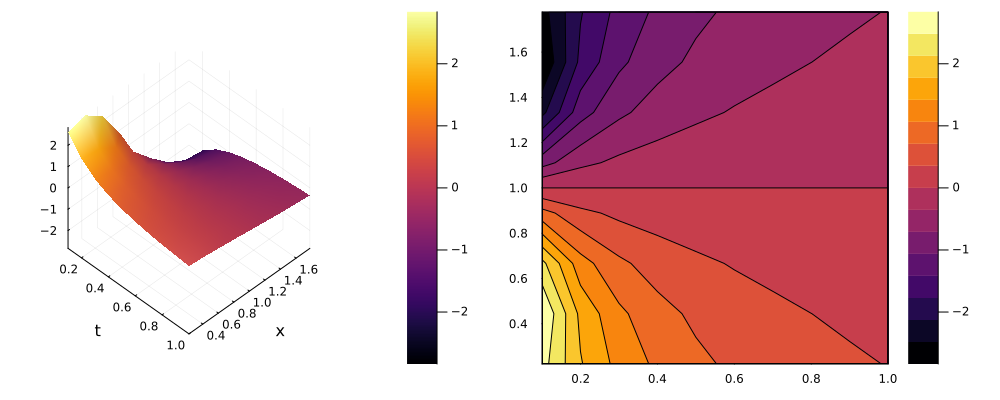

In [5]:
plot(layout = grid(1, 2),size=(1000,400));
surface!(tt,xx, real.(SS), camera = (45, 45), xlabel = "t", ylabel = "x", subplot = 1)
t = 0:.01:L
contourf!(tt,xx, real.(SS), subplot = 2)

In [7]:
plot(layout = grid(1, 2),size=(1000,400));
surface!(tt,xx, abs.(ERR), camera = (45, 45), xlabel = "t", ylabel = "x", subplot = 1)
t = 0:.01:L
contourf!(tt,xx, abs.(ERR), subplot = 2)

: 